In [1]:
# loading dataset 
import pandas as pd
import numpy as np
#visulaization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
#EDA 
from collections import Counter
#data preprocessing
from sklearn.preprocessing import StandardScaler
#Data spliting
from sklearn.model_selection import train_test_split

#Data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import matplotlib.gridspec as gridspec


#Data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xg


#combine All aka Ensumbling
from mlxtend.classifier import StackingCVClassifier

import pickle


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


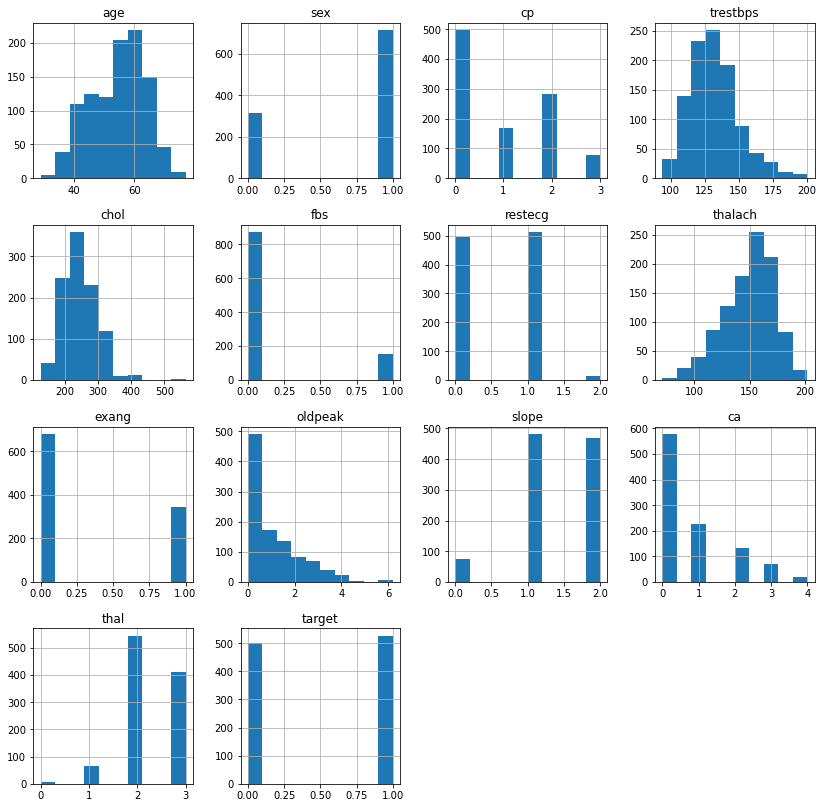

In [5]:
data.hist(figsize=(14,14))
plt.show()

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

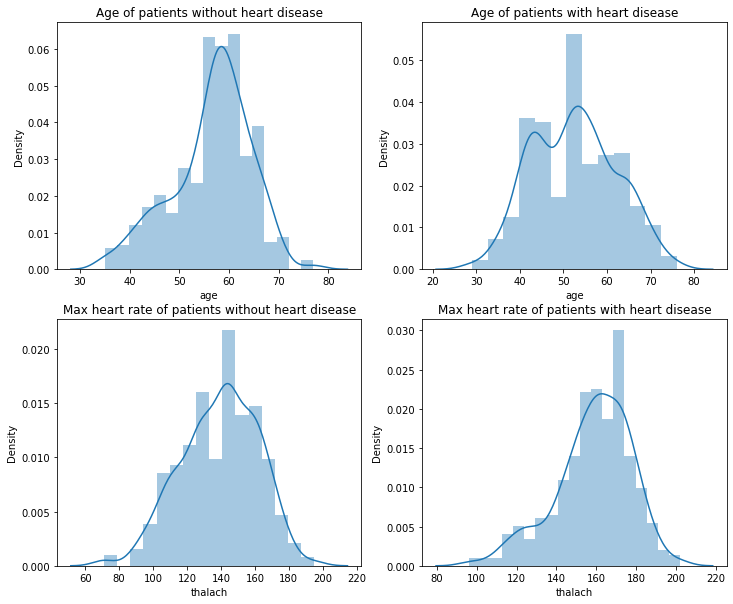

In [6]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(data[data['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(data[data['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(data[data['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [7]:
y = data["target"]
X = data.drop('target',axis=1)
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size=.20,random_state = 0,shuffle=True)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [8]:
# to test unique means to count numbers of 0's and 1's
print(y_test.unique())
Counter(y_train)


[1 0]


Counter({1: 419, 0: 401})

In [41]:
m1 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,nbpred)
nb_acc_score = accuracy_score(y_test,nbpred)
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model :",nb_acc_score*100,"\n")
print(classification_report(y_test,nbpred))



[[79 19]
 [11 96]]


Accuracy of Naive Bayes model : 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



array([1], dtype=int64)

In [46]:
m2 = 'Logistic Regression'
lr =LogisticRegression()
model =lr.fit(X_train,y_train)
lr_predict =lr.predict(X_test)
lr_conf_matrix =confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Lagoistic Regression :",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Lagoistic Regression : 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



array([0], dtype=int64)

In [63]:
m3 = 'Random Forest Classifer'
rf = RandomForestClassifier(n_estimators=10,random_state = 8,max_depth = 4)

rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predicted)
rf_acc_score =accuracy_score(y_test,rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest :",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



confussion matrix
[[ 85  13]
 [  6 101]]


Accuracy of Random Forest : 90.73170731707317 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        98
           1       0.89      0.94      0.91       107

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

[0]
[0]


In [15]:
pickle.dump(rf,open('model.pkl','wb'))

array([0], dtype=int64)

In [65]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(xgb.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]))

print(xgb.predict([[68,0,2,120,211,0,0,115,0,1.5,1,0,2]]))
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Extreme Gradient Boost: 94.6341463414634 

[0]
[0]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



array([0])

In [19]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
knn_predicted  = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test,knn_predicted)
knn_acc_score = accuracy_score(y_test,knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of kNeighbors Classifier  : ",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of kNeighbors Classifier  :  87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [24]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=6)
dt.fit(X_train,y_train)
dt_predicted  = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predicted)
dt_acc_score = accuracy_score(y_test,dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost : ",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
print("Feature importances:\n{}".format(dt.feature_importances_))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of Extreme Gradient Boost :  94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

Feature importances:
[0.1203266  0.07137318 0.22961585 0.06404778 0.08645515 0.
 0.01920312 0.03841662 0.01885578 0.13653759 0.01696149 0.14158227
 0.05662456]


In [27]:
nb.predict([[43,1,0,110,211,0,1,161,0,0,2,0,3]])



array([0], dtype=int64)

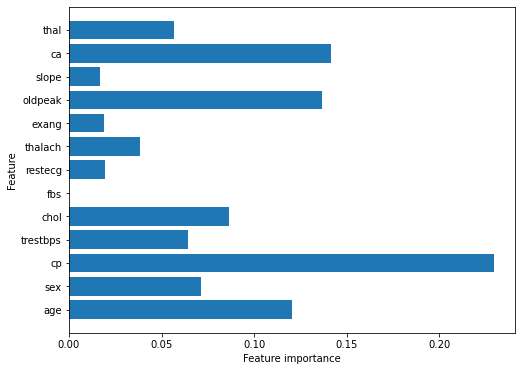

In [28]:
#الاكثر في التأثير
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')


In [32]:
m7 = 'Support Vector Classifier'
svc = SVC(kernel='rbf',C=2)
svc.fit(X_train,y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test,svc_predicted)
svc_acc_score = accuracy_score(y_test,svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of support vector machine : ",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
svc.predict([[54,1,0,110,239,0,1,126,1,2.8,1,1,3]])



confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of support vector machine :  98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



array([1], dtype=int64)

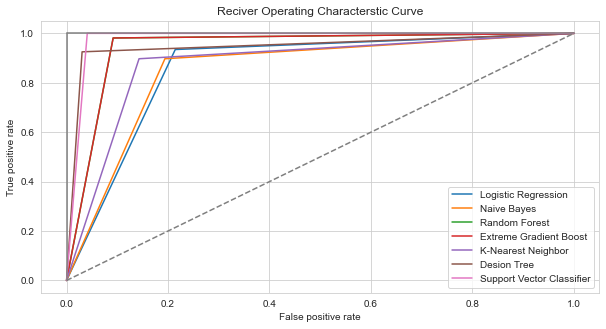

In [18]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold =roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold =roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold =roc_curve(y_test,svc_predicted)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [19]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost','K-Nearst Neighbor','Desicion Tree','Support vector classifier'],'Accuracy':[lr_acc_score*100,nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Naive Bayes,85.365854
2,Random Forest,94.634146
3,Extreme Gradient Boost,94.634146
4,K-Nearst Neighbor,87.804878
5,Desicion Tree,94.634146
6,Support vector classifier,98.048780


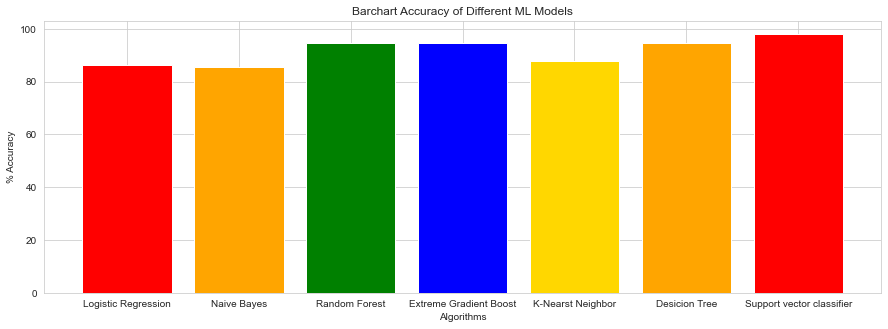

In [20]:
colors = ['red','orange','green','blue','gold','orange']
plt.figure(figsize=(15,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color =colors)
plt.show()

In [35]:
#Ensamble with SVC ,DT and KNN>88.5%
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted =scv.predict(X_test)
scv_conf_matrix =confusion_matrix(y_test,scv_predicted)
scv_acc_score = accuracy_score(y_test,scv_predicted)
print("Confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))
rf.predict([[68,0,2,120,211,0,0,115,0,1.5,1,0,2]])



Confussion matrix
[[ 92   6]
 [  0 107]]


Accuracy of StackCVClassifier: 97.07317073170731 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        98
           1       0.95      1.00      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



array([0], dtype=int64)